In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [10]:
import matplotlib.pyplot as plt


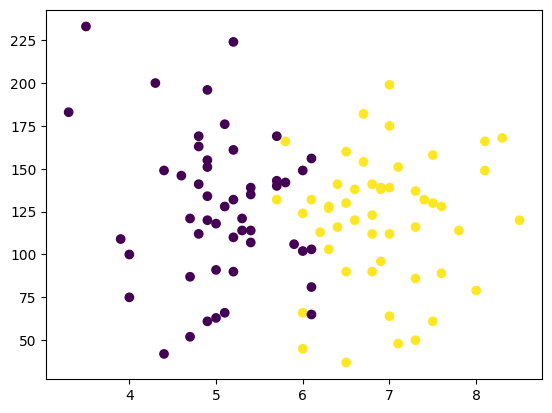

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
97,6.7,182.0
23,4.7,87.0
82,6.5,37.0
4,5.8,142.0
77,7.3,50.0
...,...,...
38,6.5,160.0
43,6.8,141.0
67,5.0,118.0
10,6.0,45.0


In [17]:
y_train

97    1
23    0
82    1
4     0
77    1
     ..
38    1
43    1
67    0
10    1
31    0
Name: placement, Length: 90, dtype: int64

In [18]:
X_test

,cgpa,iq
78,6.1,81.0
72,7.3,116.0
21,7.1,151.0
53,8.3,168.0
3,7.4,132.0
58,8.0,79.0
99,6.2,113.0
86,5.1,128.0
84,5.7,169.0
28,5.2,90.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 0.69661312,  1.43830628],
       [-1.08703357, -0.90452449],
       [ 0.51824845, -2.13759331],
       [-0.10602789,  0.45185122],
       [ 1.23170713, -1.81699542],
       [ 1.6776188 , -0.23866732],
       [-0.9086689 , -0.09069906],
       [ 0.78579546, -0.83054036],
       [-1.08703357, -0.06603769],
       [-0.19521022,  0.20523746],
       [ 0.87497779,  0.37786709],
       [ 1.4100718 ,  0.84643325],
       [-2.33558625,  1.46296766],
       [ 0.78579546, -0.28799007],
       [ 0.33988379,  0.08193057],
       [ 1.4100718 , -1.54572028],
       [-0.9086689 ,  0.77244912],
       [-0.64112189, -0.33731283],
       [-0.99785123,  0.42718984],
       [ 0.69661312,  0.74778774],
       [-0.64112189,  2.4740841 ],
       [-0.55193956, -0.23866732],
       [-0.19521022,  0.4765126 ],
       [ 0.07233678, -0.53460384],
       [ 0.51824845, -0.83054036],
       [-0.10602789,  1.04372426],
       [-0.81948656, -0.80587898],
       [-0.9086689 ,  0.67380361],
       [ 0.96416013,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 0.16151912, -1.05249275],
       [ 1.23170713, -0.18934457],
       [ 1.05334246,  0.67380361],
       [ 2.12353048,  1.09304701],
       [ 1.32088947,  0.20523746],
       [ 1.85598347, -1.1018155 ],
       [ 0.25070145, -0.2633287 ],
       [-0.73030423,  0.10659195],
       [-0.19521022,  1.11770839],
       [-0.64112189, -0.83054036]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# model training
clf.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

78    0
72    1
21    1
53    1
3     1
58    1
99    1
86    0
84    0
28    0
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.9

In [33]:
%pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/a9/f9/f62b6c3bd08e1269d9bca9aabe0d990a7c3ffbfbcc495135ad0b59ce860b/mlxtend-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=2.3.5 from https://files.pythonhosted.org/packages/49/48/fb1ce8136c19452ed15f033f8aee91d5defe515094e330ce368a0647846f/numpy-2.4.2-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Obtaining dependency information for pandas>=2.3.3 from https://files.pythonhosted.org/packages/c1/27/90683c7122febeefe84a56f2cde86a9f05f68d53885cebcc473298dfc33e/pandas-3.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall:

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

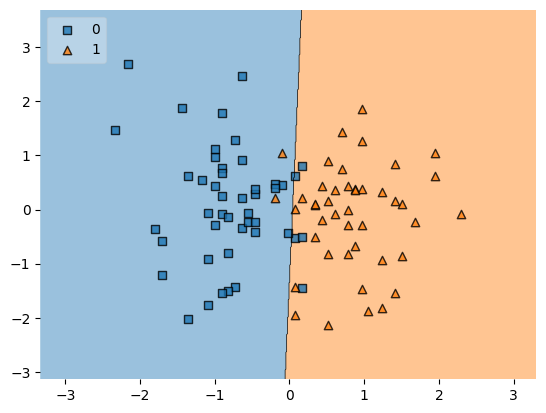

In [35]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle 

In [ ]:
pickle.dump(clf,open('model.pkl','wb')) #to create the model for deployment